# Building Set 2 - More Frequency Domain, the SigSys Abstraction

In [11]:
import sys
sys.path.append("code") # for thinkdsp code

from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import sympy

import pandas

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

In [59]:
# https://gist.github.com/Pretz/1773870

import wave
import numpy
import struct
import sys
import csv

def write_wav(data, filename, framerate, amplitude):
    wavfile = wave.open(filename, "w")
    nchannels = 1
    sampwidth = 2
    framerate = framerate
    nframes = len(data)
    comptype = "NONE"
    compname = "not compressed"
    wavfile.setparams((nchannels,
                        sampwidth,
                        framerate,
                        nframes,
                        comptype,
                        compname))
    print("Please be patient whilst the file is written")
    frames = []
    for s in data:
        mul = int(s * amplitude)
        # print "s: %f mul: %d" % (s, mul)
        frames.append(struct.pack('h', mul))
    # frames = (struct.pack('h', int(s*self.amp)) for s in sine_list)

    frames = b''.join(frames)
    wavfile.writeframes(frames)
    wavfile.close()
    print("%s written" %(filename))

fname = 'BSet2Files/handel.csv'

data = []

for value in csv.reader(open(fname, 'U'), delimiter=','):
    try:
        data.append(float(value[0]))
    except ValueError:
        pass # Just skip it
arr = numpy.array(data)
# Normalize data
arr /= numpy.max(numpy.abs(data))
filename_head, extension = fname.rsplit(".", 1)
write_wav(arr, "BSet2Files/handel.wav", 8192, 32700)



Please be patient whilst the file is written
BSet2Files/handel.wav written


## Frequency-Domain Analysis
### Discrete-time Fourier Transform (DTFT) (appx 3.5 hours including reading and exercises)

In this section, we are going to develop the Discrete-Time Fourier Transform (DTFT), which will provide better frequency resolution than the DFT, and serve as a bridge to the CT Fourier transform (CTFT), enabling us to do frequency analysis on continuous signals.

The Discrete-Time Fourier Transform (DTFT) of a DT signal is defined for any  angular frequency $\Omega$ radians per sample as follows

\begin{align}
X(\Omega) = \sum_{n=-\infty}^\infty x[n]e^{-j\Omega n}$
\end{align}


The DTFT of $x[n]$, denoted by $X(\Omega)$ tells us "how much" in magnitude and phase, of a complex exponential $e^{j\Omega n}$ is present in the signal $x[n]$. Compared to the DFT, the DTFT evaluates the frequency content in $x[n]$ at a continuum of frequencies $\Omega$. $\Omega$ here is in units of radians/sample. 

Since $\Omega$ can take a continuum of values, the inverse transform cannot take the form of a summation. The Inverse DTFT takes the form of an integral over a $2\pi$ interval. The IDFT is defined as follows

\begin{align}
x[n] = \frac{1}{2\pi}\int_{-\pi}^{\pi} X(\Omega) e^{j\Omega n} d\Omega
\end{align}

$x[n]$ is therefore made up of a dense sum (i.e. an integral) of complex exponentials (frequency components), where the frequency component corresponding to $e^{j\Omega n}$ is weighted by $X(\Omega)$. In general $X(\Omega)$ can be complex.

The DTFT has a number of useful properties which are carried over from the DFT.  If $W(\Omega)$ is the DTFT of $w[n]$, $X(\Omega)$ is the DTFT of $x[n]$,  $Y(\Omega)$ is the DTFT of $y[n]$,  we have the following properties


- If $y[n] = x[n]+w[n]$, then $Y(\Omega) = X(\Omega) + W(\Omega)$. This property enables us to decompose a signal into the sum of simpler signals, perform the DTFT on the simpler signals, and re-assemble them. 
- If $y[n] = x[n-n_0]$, then $Y(\Omega) = e^{-j\Omega n_0}X(\Omega)$. This property is useful in analyzing the effects of difference equations in the frequency domain. 
- If $y[n] = x[n]e^{j\Omega_0 n}$, then $Y(\Omega) = X(\Omega-\Omega_0)$. This property is useful for moving things around in frequency, like what we did in class on Monday. 


The following example of a moving-average filter helps illustrate how the DTFT can be used to do understand the effects of a difference equation in the frequency domain.

### 1.
Suppose that we have a signal $x[n]$. A 3-point moving average of this signal is given by  $y[n]$, which is defined as follows

\begin{align}
y[n] = \frac13(x[n+1]+x[n]+x[n-1]).
\end{align}

The result of the moving average at time $n$ is the average of the original signal at the current time, one sample ahead, and one sample before. The moving average filter has the effect of smoothing out a signal.

(a) Using the properties of the DTFT in the bullet points above, find the DTFT of $y[n]$, denoted by $Y(\Omega)$, in terms of $X(\Omega)$. Simplify your expression using $\cos\theta =\frac12 e^{j\theta}+\frac12 e^{-j\theta}$.

<b>
$y[n] = \frac13(x[n+1]+x[n]+x[n-1]$

</b>

(b) How is the frequency content of $y[n]$ related to the frequency content of $x[n]$?

Hint: think about how $Y(\Omega)$ is related to  $X(\Omega)$ at $\Omega = 0$ (low frequencies) vs $\Omega = \pi$ (high frequencies).

(c) How might you actually apply  the moving average filter to a given vector?  In other words, in MATLAB, how would you operate on a vector $x[n]$ to produce $y[n]$?  Think about  three different approaches:

i. Use a for loop.

ii. Use vector indices and vector addition.

iii. Use a matrix multiply.

Choose one that makes sense to you, and implement it.  Note that you'll have to think about how to deal with the terms at the edges: there is not a $n-1$ term if $n=0$!

In [46]:
for n in range(2):
    print(n)

0
1


(d) At the MATLAB prompt, type `load handel` to load an audio segment provided with MATLAB,  which you used in the last BSet.  Write code to implement the moving average filter, and apply it to the audio sample in `y`. Using a for loop may be the simplest approach here.

(Unfortunately, MATLAB calls this signal `y`, but this will be the input to our moving average filter).  Plot the original signal `y`, and the result of applying the moving average to it on the same axes. Zoom in on a segment of the audio signal to see the effect of the moving average in the time domain. Do you see what you expected to see? Play the original signal and the result of the moving average. Does the filtered signal sound as expected? Please turn in your plots with your answers to the questions.

AttributeError: 'list' object has no attribute 'real'

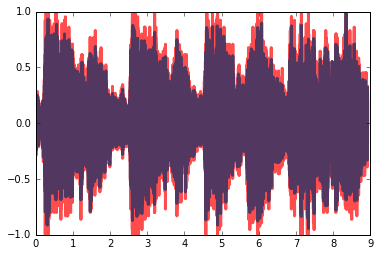

In [71]:
handel = thinkdsp.read_wave('BSet2Files/handel.wav')

dir(handel)

handel.plot(color='r')

def moving_average(sound):
    x = sound.ys
    y = [0]
    for n in range(1, len(x) - 1):
        y.append(1/3 * (x[n + 1] + x[n] + x[n - 1]))
    y.append(0)
    
    sound.ys = y
    return sound

moving_average(handel)
# handel.make_audio()

handel.plot()



(e) On the same axes, plot the magnitude of the DTFT of $x[n]$ and $y[n]$. You can use the following code segment to do this.

```
X = fft(x); % Take the FFT of x
Y = fft(y); % Take the FFT of y
Nx = length(x); % Find the length of x
Ny = length(y); % Find the length of y
% make vectors for the frequency axis points in radians 
% per sample
wx = linspace(-pi, pi*(Nx-1)/Nx, Nx); 
wy = linspace(-pi, pi*(Ny-1)/Ny, Ny); % shouldn't this be -pi to pi??
% plot the magnitudes on the same axes 
% use fftshift to reorder the FFT
plot(wx, fftshift(abs(X)));
hold on;
plot(wy, fftshift(abs(Y)), 'm'); % shouldn't this be wy and abs(Y)?
```

Please submit all plots you made, and write a sentence or two explaining qualitatively how the frequency content of the signal before and after the moving average filter is applied.

### 2.


## The Sig-Sys Abstraction and Block Diagrams (3.5 hours)

You've dealt with a variety of different types of abstraction in the past -- for example, you've represented physical situations using stock and flow diagrams, using free body diagrams, using differential equations, etc.  

A key type of abstraction that gets widely used in engineering is the so-called "sig-sys" abstraction.  This abstraction says that you can think of things as being broken down into _signals_ (which we discussed a bit last time), and _systems_ which operate on signals (ie., they take signals as input, and produce signals as output).

We tend to use "block diagrams" to represent the sig-sys abstraction, as we discussed in class.  You're actually quite used to doing this already: you did so for the bad modem. Block diagrams are frequently used in designing and representing systems, from communication systems to control systems. 

One of the very handy aspects of block diagrams is the extent to which they lend themselves to different _levels of abstraction_ - i.e., you can always  "drill down" to ask "what is the block diagram of that block?", and you can also always draw a dotted line around a set of blocks and call it a new single block. The ability to express different levels of abstraction conveniently is powerful since different situations in a design process require different levels of granularity. 

Often, block diagrams can also be translated to hardware and software more directly than mathematical expressions. As such, block diagrams using the SigSys abstraction are powerful tools for the design of real-world systems, and can offer insight that may not be as apparent by examining mathematical relationships alone.  Those of you in PoE will learn to appreciate this fact in a month or so. 

Lets think first about block diagrams for discrete signals. In the following discussions $x[n]$ represents the input signal, $y[n]$ represents the output signal, $n$ is an integer and represents the time index of the signal. Consider the following relationship between the input and  output.

\begin{align}
y[n] + ay[n-1] = bx[n]
\end{align}

$a$ and $b$ are constant coefficients here. With appropriate choices for $a$ and $b$, this expression can implement a digital filter (you've seen this kind of idea above). The above equation involves three basic operations.

- Addition
- Multiplication by a coefficient
- A delay which takes  $y[n]$ as its input and outputs the previous sample $y[n-1]$.

### 4.

![scan-2](BSet2Files/scan-2.jpg)
(c) (updated) the first one, because the second one should sort-of be zero because the noise is hopefully centered around zero, and ehhhhhhhh.

### 7.
Consider a simple model for the balance in the bank account. A certain amount is deposited every month into the account and assume that there are no withdrawals from the account. The balance amount in the account earns interest at a rate of 1% each month, which is calculated every month.  Write the input - output relationship for such a bank account and implement it ung a block diagram. Please indicate clearly which signals are the inputs and outputs in the diagram. 

    x[n] ---> (+) ------> y[n]
               ^     |
               |     v
              /a\  [ D ]
              ---    |
               ^     |
               |_____|

$a = 0.01$

### 8.

Consider the circuit described in the Figure below. Apply Kirchoff's voltage law (KVL) to note that 
 \begin{align}
 v_{in} (t)-v_R (t)-v_{out} (t)=0 \\
 v_{out}(t) = \frac1C \int_{-\infty}^t i(\tau) d\tau\,.
 \end{align}

![figure 6](BSet2Files/circuit-1.png)

Note that $v_{R}(t)$ is the voltage across the resistor, and $i(\tau)$ is the current flowing clockwise in the circuit. 

(a) Find an expression relating $v_{out}$ to $v_{in}$, and draw a block diagram representation of this system.

<b>
$v_{in}(t) = v_{out}(t) + RC\frac{d}{dt}V_{out}(t)$
</b>

Depending on how you approached the previous part, you may have come up with the following differential equation relating $v_{in}(t)$ and $v_{out}(t)$.

\begin{align}
v_{in}(t)  = v_{out}(t) + RC \frac{d}{dt}v_{out}(t)
\end{align}

By taking the CTFT of each term in the expression above, find the equation relating $V_{in}(\omega)$ and $V_{out}(\omega)$. In other words, find the relationship between the input voltage and the output voltage in frequency space. You will need to use the CTFT properties derived in the previous section for this. 

(b) 
The ratio of $V_{out}(\omega)$ to $V_{in}(\omega)$ is the frequency response of this system (again, you will see more of this later). Plot the magnitude of the frequency response in the range $\omega = 1$ to $\omega = 10^4$ radians/second. You should use  logarithmic axes here. You can use $C = 1\mu F$ and $R = 1k\Omega$, as nominal values here. Does this picture look familiar?  You will find MATLAB's `loglog` function useful to make a log-log scale plot. 


<b>
$V_{out}(\omega) = \frac{1}{1 + RCj\omega}V_{in}(\omega)$

</b>

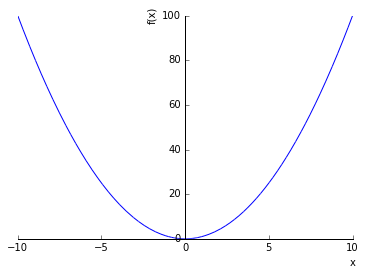

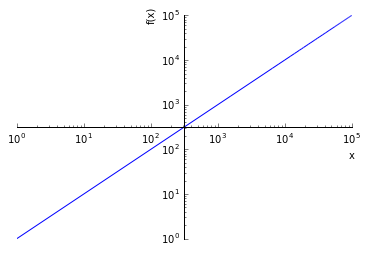

In [79]:
from sympy import symbols
from sympy.plotting import plot
import math

R = 1000
C = 1e-6

v_in = symbols('v_in')

v_out = lambda w: 1/(1 + R * C * math.I * w) * v_in

v_in = v_out + R*C*(dt)*v_out



p2 = plot((v_out, (v_out, 1, 10e4)), xscale='log', yscale='log')
